In [ ]:
#how to get table of contents:
#!jupyter nbextension install --user https://rawgithub.com/minrk/ipython_extensions/master/nbextensions/toc.js
#!curl -L https://rawgithub.com/minrk/ipython_extensions/master/nbextensions/toc.css > $(jupyter --data-dir)/nbextensions/toc.css
#!jupyter nbextension enable toc

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
def about_outliers(series):
    print('Num of rows:')
    print(series.shape[0])
    desr=series.describe()
    upper_bound=desr['75%']+1.5*(desr['75%']-desr['25%'])
    lower_bound=desr['25%']-1.5*(desr['75%']-desr['25%'])
    print('Num of normal rows:')
    print(len(series.loc[(series<upper_bound)&(series>lower_bound)]))
    print('Num of outliers:')
    print(len(series.loc[(series>upper_bound)|(series<lower_bound)]))

In [3]:
data=pd.read_csv('data/Dataset/Dataset/Training/Features_Variant_1.csv', header=None).drop_duplicates()

In [4]:
#get and fit features names
features_names=np.array(['page_likes_num',#1
               'page_checkins',#2
               'page_talking_about',#3
                'page_cat',#4
                'page_statistics',#5-29 #mean, avg etc.
                'comments_num_before_base_time',#30
                'comments_num_in_last_24_hours',#31 #last day
                'comments_num_in_last_48_to_24_hours',#32 #day before last
                'comments_num_in_first_24_hours',#33
                'comments_difference_in_last_two_days', #34 (32-31)
                         
                'base_time', #35
                'character_num_in_post', #36
                'share_num',#37
                'post_promotion', #38 binary
                'h_local', #39 This describes the H hrs, for which we have the target variable/ comments received. 
                'post_published_weekday', #40-46 This represents the day(Sunday...Saturday) on which the post was published. 
                'base_datetime_weekday', #47-53 This represents the day(Sunday...Saturday) on selected base Date/Time. 
                'target' #54 The no of comments in next H hrs(H is given in Feature no 39).                
               ])

for index in range(5,29):
    features_names=np.insert(features_names, index, features_names[4]+'_'+str(index-4))
    
weekday=('sunday', 'monday','tuesday', 'wednesday', 'thursday', 'friday', 'saturday')    

for index in range(40,47):
    features_names=np.insert(features_names,index, features_names[39]+'_'+ weekday[index-40])
features_names=np.delete(features_names, 39)

for index in range(47,54):
    features_names=np.insert(features_names,index, features_names[46]+'_'+ weekday[index-47])
features_names=np.delete(features_names, 46)

data.columns=features_names

In [5]:
data=data.drop(columns=['post_promotion'])

# vis

## numeric values

### page_likes_num

In [ ]:
#data['page_likes_num'] #float
boxplot = data.boxplot(column=['page_likes_num'], showfliers=False)

In [ ]:
#try make log
tmp=np.log(data['page_likes_num'])
plt.boxplot(tmp, showfliers=False)
plt.show()

In [ ]:
"""
tmp=np.log(data['page_likes_num'])
plt.boxplot(tmp)
plt.show()
"""

In [ ]:
about_outliers(data['page_likes_num'])

In [ ]:
ser_tmp=pd.Series(tmp, name='tmp')
about_outliers(ser_tmp)

In [ ]:
print('Num of rows:')
print(len(tmp))
desr=tmp.describe()
upper_bound=desr['75%']+3*(desr['75%']-desr['25%'])
lower_bound=desr['25%']-3*(desr['75%']-desr['25%'])
print('Num of normal rows:')
print(len(ser_tmp.loc[(ser_tmp<upper_bound)&(ser_tmp>lower_bound)]))
print('Num of outliers:')
print(len(ser_tmp.loc[(ser_tmp>upper_bound)|(ser_tmp<lower_bound)]))

In [ ]:

plt.figure(figsize=(15,7))
plt.scatter(x=data['page_likes_num'], y=data['target'])
plt.xlim(0,0.4e8)
plt.xlabel('page_likes_num')
plt.ylabel('target')
plt.title('scatter page_likes_num')
plt.show()


In [ ]:

plt.figure(figsize=(15,7))
plt.scatter(x=tmp, y=data['target'])
plt.xlim(0,20)
plt.xlabel('page_likes_num')
plt.ylabel('target')
plt.title('scatter log(page_likes_num)')
plt.show();


In [ ]:
plt.figure(figsize=(15,7))
tmp2=data['page_likes_num'].loc[data['page_likes_num']<0.5e5]
plt.hist(x=tmp2)
plt.xlabel('page_likes_num')
plt.ylabel('target')
plt.title('page_likes_num distribution')
plt.show()

In [ ]:
plt.figure(figsize=(15,7))
plt.hist(x=tmp)
plt.xlabel('page_likes_num')
plt.ylabel('target')
plt.title('log(page_likes_num) distribution')
plt.show()

### 'page_checkins' 

In [ ]:
boxplot = data.boxplot(column=['page_checkins'], showfliers=False)

In [ ]:
about_outliers(data['page_checkins'])

In [ ]:

plt.figure(figsize=(15,7))
plt.scatter(x=data['page_checkins'], y=data['target'])
plt.xlabel('page_checkins')
plt.ylabel('target')
plt.title('scatter page_checkins')
plt.show()


In [ ]:
plt.figure(figsize=(15,7))
tmp2=data['page_checkins'].loc[data['page_checkins']<250]
plt.hist(x=tmp2)
plt.xlabel('page_checkins')
plt.ylabel('target')
plt.title('page_checkins distribution')
plt.show()

In [ ]:
print('Size:')
print(data['page_checkins'].shape[0])
print('Amount of zero values:')
print(data['page_checkins'].loc[data['page_checkins']==0].shape[0])

### page_talking_about 

In [ ]:
boxplot = data.boxplot(column=['page_talking_about'], showfliers=False)

In [ ]:
#try make log
tmp=np.log(data['page_talking_about'])
plt.boxplot(tmp, showfliers=False)
plt.show()

In [ ]:
about_outliers(data['page_talking_about'])

In [ ]:
about_outliers(pd.Series(tmp, name='tmp'))

In [ ]:
plt.figure(figsize=(15,7))
plt.scatter(x=data['page_talking_about'], y=data['target'])
plt.xlabel('page_talking_about')
plt.ylabel('target')
plt.title('scatter page_talking_about')
plt.show()

In [ ]:
plt.figure(figsize=(15,7))
plt.scatter(x=tmp, y=data['target'])
plt.xlabel('log(page_talking_about)')
plt.ylabel('target')
plt.title('scatter log(page_talking_about)')
plt.show()

In [ ]:
plt.figure(figsize=(15,7))
plt.hist(x=data['page_talking_about'])
plt.xlabel('page_talking_about')
plt.title('page_talking_about distribution')
plt.show()

In [ ]:
tmp.loc[tmp==-np.inf]=-100

In [ ]:
plt.figure(figsize=(15,7))

plt.hist(x=tmp)
plt.xlabel('log(page_talking_about)')
plt.title('log(page_talking_about) distribution')
plt.show()

### 'page_statistics' 5-29 cols

In [ ]:
names=data.columns[data.columns.astype(str).str.contains('page_statistics')==True]

In [ ]:
f=plt.figure(figsize=(30, 30))

plt.matshow(data[names].corr(), fignum=f.number)
plt.xticks(range(data[names].shape[1]), names, fontsize=14, rotation=75)
plt.yticks(range(data[names].shape[1]), names, fontsize=14)

cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)

plt.title('Correlation Matrix', fontsize=20)

In [ ]:
nums=np.array([1, 2, 11, 20, 22, 23],dtype=str)
names=['page_statistics_'+n for n in nums]

In [ ]:
print(data.loc[data['page_statistics']==0].shape[0])
print(data.loc[data['page_statistics_15']==0].shape[0])
print(data.loc[data['page_statistics_5']==0].shape[0])
print(data.loc[data['page_statistics_10']==0].shape[0])

In [ ]:
print(data.loc[data['page_statistics_23']==0].shape[0])

In [ ]:
for name in names:
    plt.figure(figsize=(5,5))
    data.boxplot(column=name,showfliers=False, grid=False)
    plt.show()
    
    plt.figure(figsize=(15,7))
    plt.hist(x=data[name])
    plt.xlabel(name)
    plt.title(name+' distribution')
    plt.show()
    
    plt.figure(figsize=(15,7))
    plt.scatter(x=data[name], y=data['target'])
    plt.xlabel(name)
    plt.ylabel('target')
    plt.xlim(0,20)
    plt.title(name)
    plt.show()

In [ ]:
nums_group_1=np.array([1,2,11], dtype=str)
names_group_1=['page_statistics_'+num for num in nums_group_1]

In [ ]:
data[np.append(names_group_1, 'target')].corr()

In [ ]:
tmp_df=pd.DataFrame(np.sqrt(data[names_group_1]), columns=names_group_1)

In [ ]:
for name in names_group_1:
    plt.figure(figsize=(5,5))
    tmp_df.boxplot(column=name,showfliers=False, grid=False)
    plt.show()

In [ ]:
# 20 и 22

In [ ]:
plt.figure(figsize=(15,7))
plt.scatter(x=tmp, y=data['target'])
plt.xlabel('page_statistics_20')
plt.ylabel('target')
plt.xlim(0,20)
plt.title('scatter page_statistics_20')
plt.show()

In [ ]:
plt.figure(figsize=(15,7))
plt.scatter(x=tmp, y=data['target'])
plt.xlabel('page_statistics_22')
plt.ylabel('target')
plt.xlim(0,20)
plt.title('scatter page_statistics_22')
plt.show()

### comments_num* #30-34

In [ ]:
names=['comments_num_before_base_time',#30
                'comments_num_in_last_24_hours',#31 #last day
                'comments_num_in_last_48_to_24_hours',#32 #day before last
                'comments_num_in_first_24_hours',#33
                'comments_difference_in_last_two_days' ]

f2=plt.figure(figsize=(5, 5))

plt.matshow(data[names].corr(), fignum=f2.number)
plt.xticks(range(data[names].shape[1]), names, fontsize=14, rotation=75)
plt.yticks(range(data[names].shape[1]), names, fontsize=14)

cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)

In [ ]:
data[names].corr()

In [ ]:
for name in names:
    print('Zero num in '+name)
    print(data.loc[data[name]==0].shape[0])

In [ ]:
for name in names:
    plt.figure(figsize=(5,5))
    data.boxplot(column=name,showfliers=False, grid=False)
    plt.show()
    
    plt.figure(figsize=(15,7))
    plt.hist(x=data[name])
    plt.xlabel(name)
    plt.title(name+' distribution')
    plt.show()
    
    plt.figure(figsize=(15,7))
    plt.scatter(x=data[name], y=data['target'])
    plt.xlabel(name)
    plt.ylabel('target')
    plt.title(names[0])
    plt.show()

### character_num_in_post

In [ ]:
plt.figure(figsize=(15,7))
plt.hist(x=data['character_num_in_post'].loc[data['character_num_in_post']<1000])
plt.xlabel('character_num_in_post')

plt.title('character_num_in_post'+' distribution')
plt.show()

In [ ]:
data.loc[data['character_num_in_post']==0].shape

In [ ]:
plt.figure(figsize=(15,7))
plt.scatter(x=data['character_num_in_post'], y=data['target'])
plt.xlabel('character_num_in_post')
plt.ylabel('target')
plt.xlim(0,5000)
plt.title('character_num_in_post')
plt.show()

###   'share_num' 

In [ ]:
print(data.loc[data['share_num']==0].shape[0])
print(data.loc[data['share_num']==1].shape[0])

In [ ]:
plt.figure(figsize=(15,7))
plt.hist(x=data['share_num'].loc[data['share_num']<1000])
plt.xlabel('share_num')

plt.title('share_num'+' distribution')
plt.show()

In [ ]:
tmp=np.log(data['share_num'])

plt.figure(figsize=(15,7))
plt.hist(x=tmp)
plt.xlabel('log share_num')

plt.title('log share_num'+' distribution')
plt.show()

In [ ]:
plt.figure(figsize=(15,7))
plt.scatter(x=data['share_num'], y=data['target'])
plt.xlabel('share_num')
plt.ylabel('target')
plt.xlim(0,5000)
plt.title('share_num')
plt.show()

## categories

### 'page_cat'

In [ ]:
print('amount of categories:')
print(len(data['page_cat'].unique()))

In [ ]:
plt.figure(figsize=(15,7))
tmp=data.groupby(by=['page_cat'])['page_cat'].count()
print(tmp.sort_values().head())
print(tmp.sort_values().tail())
plt.bar(list(tmp.index),tmp.values)
plt.xlabel('page_cat')
plt.title('page_cat distribution')
plt.show()

### 'base_time' 

In [ ]:
y=data['base_time'].unique()
y.sort()
print(y)

In [ ]:
plt.figure(figsize=(15,7))
tmp=data.groupby(by=['base_time'])['base_time'].count()
print(tmp.sort_values().head())
print(tmp.sort_values().tail())
plt.bar(list(tmp.index),tmp.values)
plt.xlabel('base_time')
plt.title('base_time distribution')
plt.show()

In [ ]:
data.boxplot(column='target', by='base_time', showfliers=False, figsize=(15,7))

### h_local 

In [ ]:
y=data['h_local'].unique()
y.sort()
print(y)

In [ ]:
plt.figure(figsize=(15,7))
tmp=data.groupby(by=['h_local'])['h_local'].count()
print(tmp.sort_values().head())
print(tmp.sort_values().tail())
plt.bar(list(tmp.index),tmp.values)
plt.xlabel('h_local')
plt.title('h_local distribution')
plt.show()

In [ ]:
data.boxplot(column='target', by='h_local', showfliers=False, figsize=(15,7))

###  'post_published_weekday', #40-46 This represents the day(Sunday...Saturday) on which the post was published. 

In [ ]:
names=data.columns[data.columns.astype(str).str.contains('post_published_weekday')==True]

In [ ]:
tmp_df=data[names]

In [ ]:
print(tmp_df.sum(axis=0))

In [ ]:
for name in names:    
    #data.boxplot(column='target', by=name, showfliers=False, figsize=(15,7))
    
    plt.figure(figsize=(15,7))
    plt.scatter(x=data[name], y=data['target'])
    plt.xlabel(name)
    plt.ylabel('target')
    plt.xlim(-0.5,1.5)
    plt.title(name)
    plt.show()

In [ ]:
f=plt.figure(figsize=(30, 30))
names=np.append(names,'target')
plt.matshow(data[names].corr(), fignum=f.number)
plt.xticks(range(data[names].shape[1]), names, fontsize=14, rotation=75)
plt.yticks(range(data[names].shape[1]), names, fontsize=14)

cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)

In [ ]:
data[names].corr()

### 'base_datetime_weekday', #47-53 This represents the day(Sunday...Saturday) on selected base Date/Time.  

In [ ]:
names=data.columns[data.columns.astype(str).str.contains('base_datetime_weekday')==True]

In [ ]:
tmp_df=data[names]
print(tmp_df.sum(axis=0))

In [ ]:
for name in names:    
    data.boxplot(column='target', by=name, showfliers=False, figsize=(15,7))
    
    plt.figure(figsize=(15,7))
    plt.scatter(x=data[name], y=data['target'])
    plt.xlabel(name)
    plt.ylabel('target')
    plt.xlim(-0.5,1.5)
    plt.title(name)
    plt.show()

In [ ]:
f=plt.figure(figsize=(30, 30))
names=np.append(names,'target')
plt.matshow(data[names].corr(), fignum=f.number)
plt.xticks(range(data[names].shape[1]), names, fontsize=14, rotation=75)
plt.yticks(range(data[names].shape[1]), names, fontsize=14)

cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)

In [ ]:
data[names].corr()

# ALL

## Target

In [ ]:
data.boxplot(column='target', showfliers=True, figsize=(15,7))

In [ ]:
data.loc[data['target']==0].shape[0]

In [ ]:
plt.figure(figsize=(15,7))
plt.hist(x=data.loc[data['target']<20, 'target'])
plt.xlabel('target')
plt.xlim(0,20)
plt.title('target distribution')
plt.show()

In [ ]:
tmp=(data['target'])**(1/4)

plt.figure(figsize=(15,7))
plt.hist(x=tmp)
plt.xlabel('target')
#plt.xlim(0,20)
plt.title('target distribution')
plt.show()

In [ ]:
tmp.max()

## Target vs others 

In [ ]:
correlations_with_target=data.corr()

In [ ]:
correlations_with_target['target'].sort_values()

# Выводы

## float data

**1. page_likes_num:**
 - можно попробовать прологарифмировать
 - можно попробовать убрать выбросы
 
**2. page_checkins**
 - слишком много нулей (больше половины: 25 тысяч из 40)
 - может быть стоит убрать из рассмотрения из-за нулей или
 - может стоит перекодировать (0 против всех)
 
**3. page_talking_about**
 - может стоит прологарифмировать, но при этом стоит обработать -inf
 - возможно, стоит убрать выбросы
 
**4. page_statistics' 5-29 cols**
 - наблюдаются сильные корреляции между признаками (0 с 15, 1 с 4, 6, 9 и тд), часть из них можно убрать, стоит оставиь признаки с номерами: 0, 1, 2, 5, 10, 11, 20, 22, 23. Остальные признаки имеют сильные корреляции с этими признаками, поэтому информации из отобранных признаков может оказаться достаточно.
 - признаки 0, 5, 10 и 15 имеют слишком много нулей (больше 37 тысяч из 40). Их лучше убрать, либо один против всех
 - признак 23 имеет половину 0, можно сделать один против всех
 - для 1,2,11 можно попробовать корень или логарифм распределения
 - из графиков рассеяния можно увидеть, что целевая переменная слабо зависит от 1,2,11, то же самое видно из коэффициентов корреляции, надо проверить попробовать запустить без этих параметров
 
**5. 'comments_num_'**

 - 'comments_num_before_base_time' сильно коррелирует с  'comments_num_in_first_24_hours', можно попробовать без одного из этих полей
 - во всех наблюдается большое количество нулей, стоит кодировать (один против всех, там где 15-20 тысяч и другое кодирование для других)
 
**6. character_num_in_post**
 
 - Целочисленное значение, которое можно попробовать закодировать (до 100 знаков и тд)
 - Много нулей: чуть меньше 5 тысяч из 40
 - Есть зависимость целевой переменной:  чем большу символов, тем меньше лайков чаще всего
 
**7. share_num**

 - Нулей нет, много единиц: более 8 тысяч из 40, можно попробовать перекодировать по диапазонам
 - Логарифм не сильно помогает из-за большого числа единиц

## cat data

**8. 'page_cat'**
 - 81 категория
 - каких-то значений много 7491, каких-то мало 1, возможно, признак не стоит рассматривать, либо стоит закодировать по частоте
 - в pdf файле есть текстовые названия, названия содержат однокоренные слова (sport, art), можно попробовать рассмотреть как тексты
 - можно закодировать one-hot
 - можно и тексты, и one-hot
 
**9. base_time**
 - В документации указано, что это закодированное значение в диапозоне от 0 до 71, на практике от 0 до 72
 - Разница в объеме данных для каждого значения небольшая (минимум 489 записей, максимум 625 записей)
 - Распределение целевой переменной для некоторых значений могут сильно различаться
 - Можно попробовать развернуть в one-hot encoding, но тогда возможно будет потеряна связь между значениями признака, а зависимость целевой переменной от признака к признаку заметно: чем больше признак, тем меньше разброс значений переменной.
 
**10. h_local**
 - значения от 1 до 24, очень плохо сбалансировано, почти все значения равны 24. Можно попробовать убрать или сделать один против всех или one-hot
 - зависимость целевой переменной между соседними признаками не наблюдаема, надо посчитать
 
**11. post_published_weekday_**
 - для каждого столбца 5-6 тысяч ненулевых значений
 - для всех столбцов boxplot целевой переменной для значений 0 и 1 выглядит одинаково,но очень большое количество данных отсеиваются как выбросы, поэтому стоит посмотреть на матрицу корреляций
 - из матрицы корреляций видно, что признаки очень слабо коррелируют с целевой переменной, можно попробовать без них

**12. base_datetime_weekday_**
 - для каждого столбца 5-6 тысяч ненулевых значений
 - для всех столбцов boxplot, кроме пятницы и субботы целевой переменной для значений 0 и 1 выглядит одинаково,но очень большое количество данных отсеиваются как выбросы, поэтому стоит посмотреть на матрицу корреляций
 - из матрицы корреляций видно, что признаки очень слабо коррелируют с целевой переменной, можно попробовать без них

## target
 - очень много нулей: 22 тысячи из 40
 

# Возможные дополнительные признаки

1. Из признаков post_published_weekday_ и base_datetime_weekday_ вывести бинарный признак выходного дня
2. Отношение share_num к comments_num_before_base_time
3. Отношение page_talking_about к page_likes_num #доля репостов к лайкам
4. Отношение comments_num_in_last_24_hours к comments_num_before_base_time
5. Отношение comments_num_in_last_24_hours к comments_num_in_last_48_to_24_hours #скорость падения интереса
6. Отношение 'comments_num_in_last_24_hours' к 'comments_num_in_first_24_hours'
7. Попробовать квадратичные признаки

## Features engineering

### Some interesting features 

In [6]:
#1. Из признаков post_published_weekday_ и base_datetime_weekday_ вывести бинарный признак выходного дня
data['is_post_published_in_holiday']=data[['post_published_weekday_saturday',
                                          'post_published_weekday_sunday']].apply(lambda x: 
                                                                                 1 if (
                                                                                     x['post_published_weekday_saturday']==1
                                                                                 ) or (
                                                                                     x['post_published_weekday_sunday']==1
                                                                                 )
                                                                                else 0, axis=1)
data['is_base_datetime_holiday']=data[['base_datetime_weekday_saturday',
                                          'base_datetime_weekday_sunday']].apply(lambda x: 
                                                                                 1 if (
                                                                                     x['base_datetime_weekday_saturday']==1
                                                                                 ) or (
                                                                                     x['base_datetime_weekday_sunday']==1
                                                                                 )
                                                                                else 0, axis=1)

In [10]:
print('zero num in is_post_published_in_holiday')
print(data.loc[data['is_post_published_in_holiday']==0].shape)

zero num in is_post_published_in_holiday
(30326, 55)


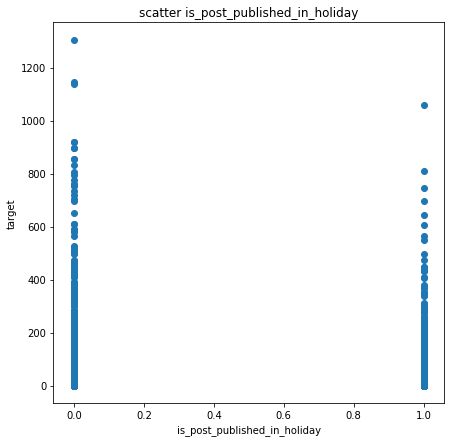

In [12]:
plt.figure(figsize=(7,7))
plt.scatter(x=data['is_post_published_in_holiday'], y=data['target'])

plt.xlabel('is_post_published_in_holiday')
plt.ylabel('target')
plt.title('scatter is_post_published_in_holiday')
plt.show()

In [22]:
print('zero num in is_base_datetime_holiday')
print(data.loc[data['is_base_datetime_holiday']==0].shape[0])

zero num in is_base_datetime_holiday
29210


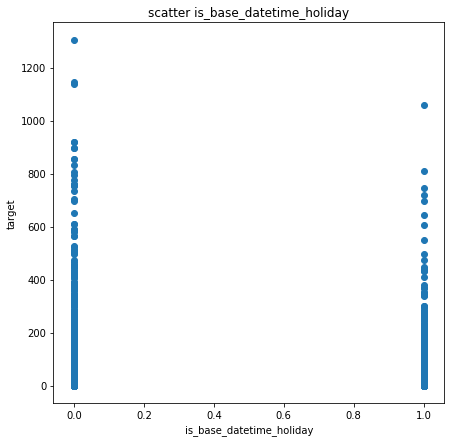

In [15]:
plt.figure(figsize=(7,7))
plt.scatter(x=data['is_base_datetime_holiday'], y=data['target'])

plt.xlabel('is_base_datetime_holiday')
plt.ylabel('target')
plt.title('scatter is_base_datetime_holiday')
plt.show()

In [16]:
# 2. Отношение share_num к comments_num_before_base_time
print('zeros num in denominator:')
print(data.loc[data['comments_num_before_base_time']==0].shape[0])
data['share_part_in_comm']=data['share_num']/(data['comments_num_before_base_time']+1)

zeros num in denominator:
6691


In [27]:
print('zero num in share_part_in_comm')
print(data.loc[data['share_part_in_comm']==0].shape[0])

zero num in share_part_in_comm
0


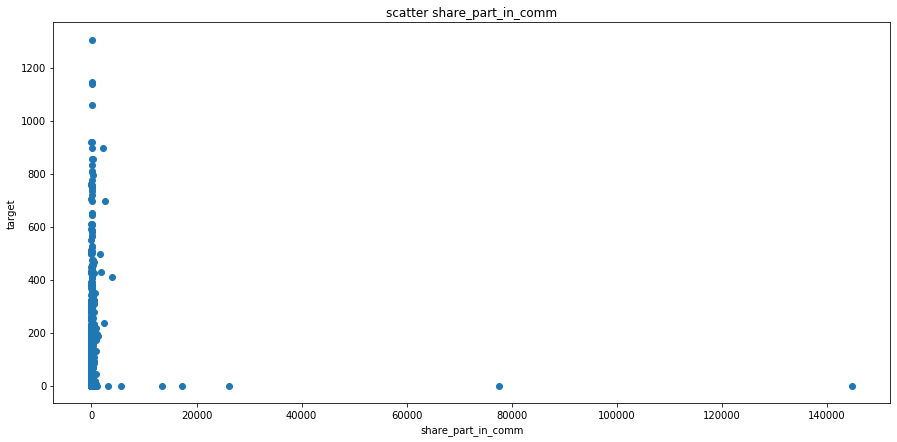

In [23]:
plt.figure(figsize=(15,7))
plt.scatter(x=data['share_part_in_comm'], y=data['target'])

plt.xlabel('share_part_in_comm')
plt.ylabel('target')
plt.title('scatter share_part_in_comm')
plt.show()

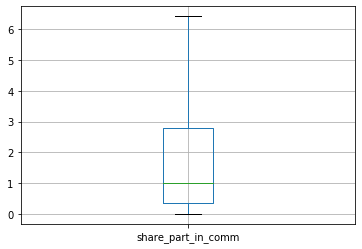

In [28]:
boxplot = data.boxplot(column=['share_part_in_comm'], showfliers=False)

In [33]:
# 3. Отношение page_talking_about к page_likes_num #доля репостов к лайкам
print('zeros num in denominator:')
print(data.loc[data['page_likes_num']==0].shape[0])
data['page_share_part_in_likes']=data['page_talking_about']/(data['page_likes_num']+1)

zeros num in denominator:
0


In [34]:
print('zero num in page_share_part_in_likes')
print(data.loc[data['page_share_part_in_likes']==0].shape[0])

zero num in page_share_part_in_likes
631


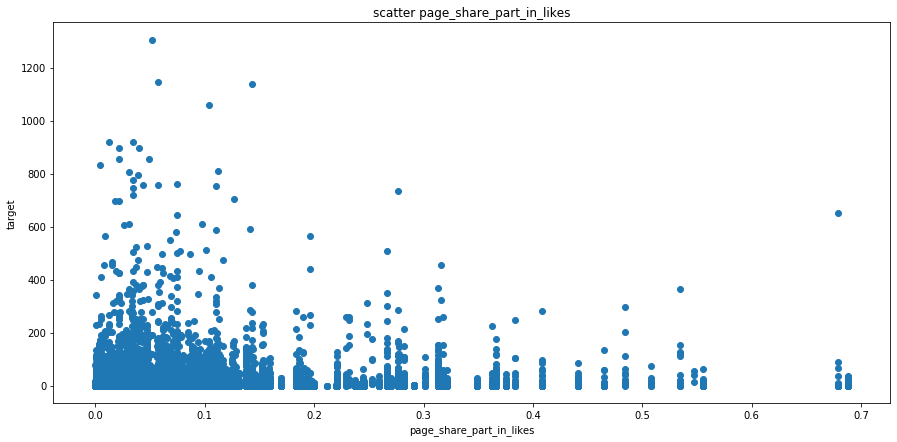

In [36]:
plt.figure(figsize=(15,7))
plt.scatter(x=data['page_share_part_in_likes'], y=data['target'])

plt.xlabel('page_share_part_in_likes')
plt.ylabel('target')
plt.title('scatter page_share_part_in_likes')
plt.show()

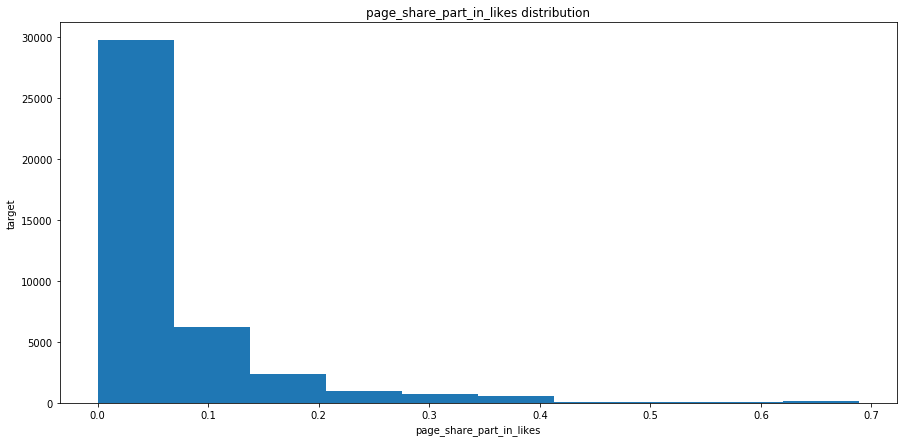

In [40]:
plt.figure(figsize=(15,7))

plt.hist(x=data['page_share_part_in_likes'])
plt.xlabel('page_share_part_in_likes')
plt.ylabel('target')
plt.title('page_share_part_in_likes distribution')
plt.show()

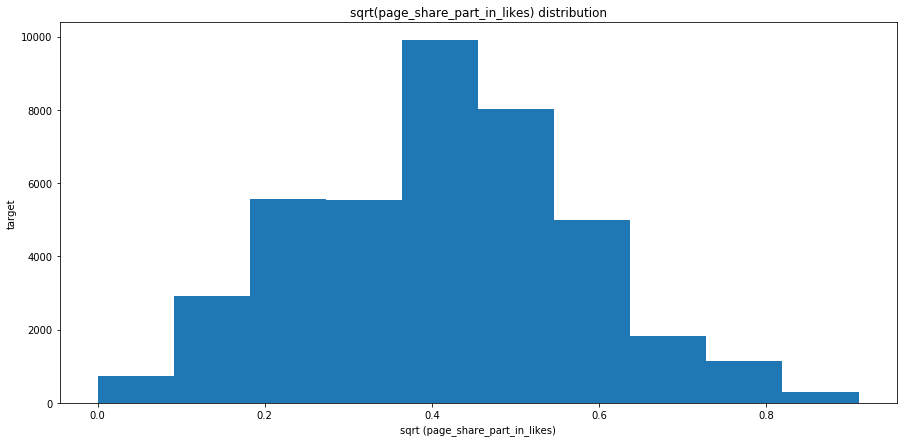

In [52]:
tmp_page_share_part_in_likes=(data['page_share_part_in_likes'])**(1/4)
plt.figure(figsize=(15,7))

plt.hist(x=tmp_page_share_part_in_likes)
plt.xlabel('sqrt (page_share_part_in_likes)')
plt.ylabel('target')
plt.title('sqrt(page_share_part_in_likes) distribution')
plt.show()

In [55]:
# 4. Отношение comments_num_in_last_24_hours к comments_num_before_base_time
print('zeros num in denominator:')
print(data.loc[data['comments_num_before_base_time']==0].shape[0])
data['comm_part_1']=data['comments_num_in_last_24_hours']/(data['comments_num_before_base_time']+1)

zeros num in denominator:
6691


In [56]:
print('zero num in comm_part_1')
print(data.loc[data['comm_part_1']==0].shape[0])

zero num in comm_part_1
15016


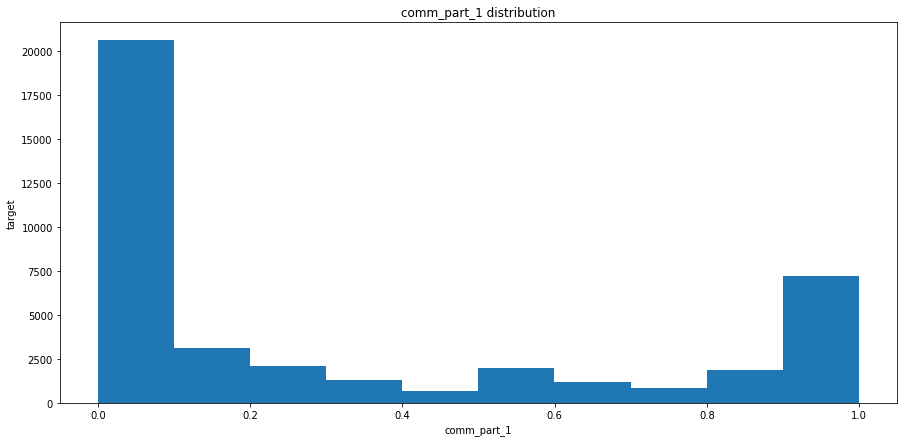

In [59]:
plt.figure(figsize=(15,7))

plt.hist(x=data['comm_part_1'])
plt.xlabel('comm_part_1')
plt.ylabel('target')
plt.title('comm_part_1 distribution')
plt.show()

In [66]:
#data['comm_part_1_is_zero']=data['comm_part_1'].apply(lambda x: 1 if x==0 else 0)
#data['comm_part_1_not_a_zero']=data['comm_part_1'].apply(lambda x: 1 if x>0 else 0)

In [69]:
# 5. Отношение comments_num_in_last_24_hours к comments_num_in_last_48_to_24_hours #скорость падения интереса
print('zeros num in denominator:')
print(data.loc[data['comments_num_in_last_48_to_24_hours']==0].shape[0])
data['comm_part_2']=data['comments_num_in_last_24_hours']/(data['comments_num_in_last_48_to_24_hours']+1)

zeros num in denominator:
20921


In [91]:
print('zero num in comm_part_2')
print(data.loc[data['comm_part_2']==0].shape[0])

zero num in comm_part_2
15016


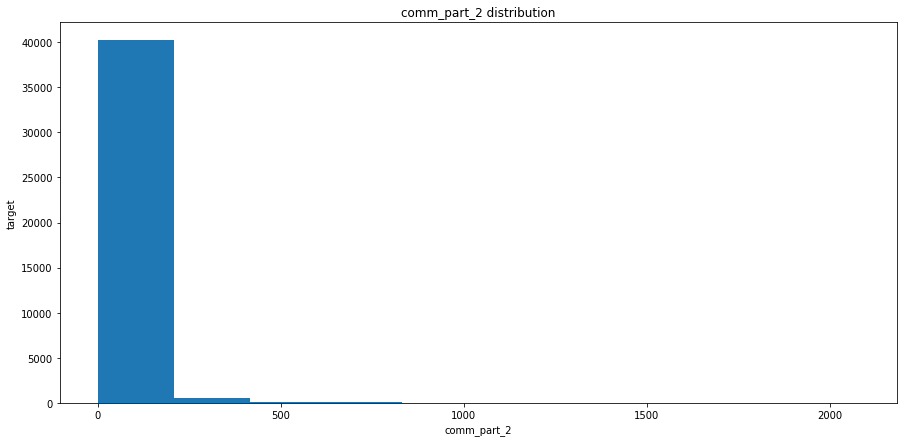

In [78]:
plt.figure(figsize=(15,7))

plt.hist(x=data['comm_part_2'])
plt.xlabel('comm_part_2')
plt.ylabel('target')
plt.title('comm_part_2 distribution')
plt.show()

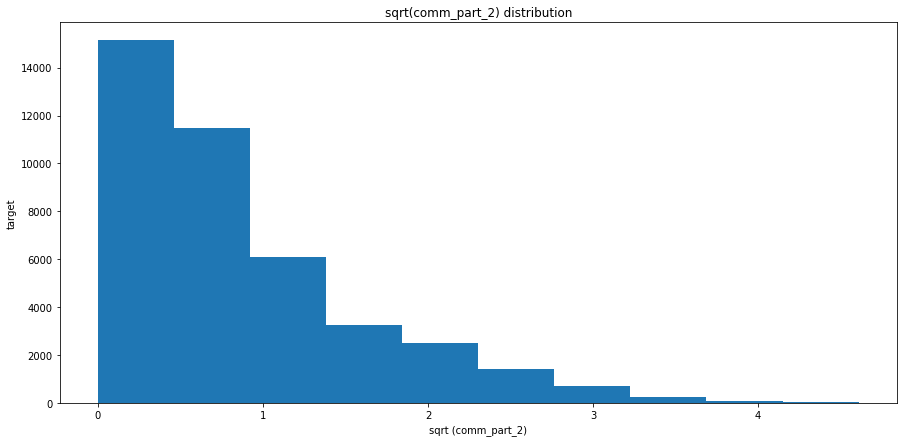

In [89]:
tmp_page_share_part_in_likes=(data['comm_part_2'])**(1/5)
plt.figure(figsize=(15,7))

plt.hist(x=tmp_page_share_part_in_likes)
plt.xlabel('sqrt (comm_part_2)')
plt.ylabel('target')
plt.title('sqrt(comm_part_2) distribution')
plt.show()

In [93]:
# 6. Отношение 'comments_num_in_last_24_hours' к 'comments_num_in_first_24_hours'
print('zeros num in denominator:')
print(data.loc[data['comments_num_in_first_24_hours']==0].shape[0])
data['comm_part_3']=data['comments_num_in_last_24_hours']/(data['comments_num_in_first_24_hours']+1)

zeros num in denominator:
6908


In [94]:
print('zero num in comm_part_3')
print(data.loc[data['comm_part_3']==0].shape[0])

zero num in comm_part_3
15016


## target vs new features 

In [103]:
corr_cols=['is_post_published_in_holiday','is_base_datetime_holiday','share_part_in_comm','page_share_part_in_likes',
         'comm_part_1','comm_part_2','comm_part_3', 'target']

In [105]:
data[corr_cols].corr()['target'].sort_values()

is_base_datetime_holiday       -0.017860
is_post_published_in_holiday   -0.008525
share_part_in_comm              0.009015
page_share_part_in_likes        0.055898
comm_part_3                     0.194028
comm_part_1                     0.242200
comm_part_2                     0.512867
target                          1.000000
Name: target, dtype: float64

In [107]:
comm2_cols=['comm_part_2' ,'comments_num_in_last_24_hours','comments_num_in_first_24_hours','target']
data[comm2_cols].corr()

,comm_part_2,comments_num_in_last_24_hours,comments_num_in_first_24_hours,target
comm_part_2,1.000000,0.910810,0.494483,0.512867
comments_num_in_last_24_hours,0.910810,1.000000,0.689487,0.528693
comments_num_in_first_24_hours,0.494483,0.689487,1.000000,0.341748
target,0.512867,0.528693,0.341748,1.000000


### Poly features 

In [16]:
"""
# 7. Попробовать квадратичные признаки
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(2, interaction_only=True, include_bias=False)
cols=np.array(data.columns)
cols=cols[cols!='target']
data_copy_without_target=data.loc[:,cols]
poly_feat=poly.fit_transform(data)

new_df=pd.DataFrame(poly_feat)
data=data.reset_index(drop=True)
new_df=pd.concat([new_df, data['target']], axis=1)
"""

## Выводы для новых фич 

1. is_post_published_in_holiday и is_base_datetime_holiday - очень много нулей: 30 тысяч из 40. Из scatter plot ожно увидеть небольшую зависимость целевой переменной, стоит посмотреть на корреляцию.
2. share_part_in_comm
3. page_share_part_in_likes - стоит попробовать рассмотреть корень 4 степени. С этим признаком скорее всего можно работать.
4. comm_part_1 - 15 тысяч нулей из 40, получилось мульимодальное распределение -> стоит разделить на 2 части бинарно: является 0 или нет
5. comm_part_2 - 15 тысяч нулей из 40, может стоит сделать бинарным. Из выведенных признаков сильнее всего коррелирует с целевой переменной, скорее всего из-за числителя.
6. comm_part_3 - 15 тысяч нулей из 40, может стоит сделать бинарным.